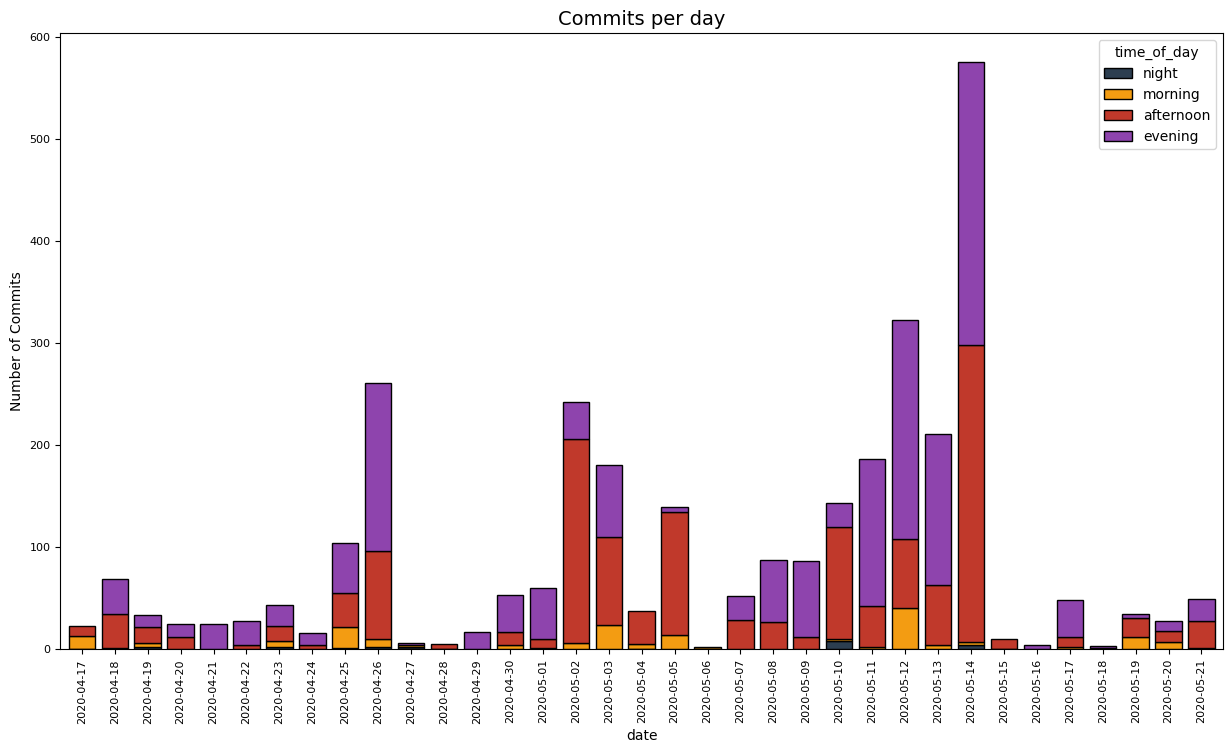

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../../datasets/data/checking-logs.sqlite')

query_commits = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""

commits_df = pd.read_sql(query_commits, conn)

commits_df['timestamp'] = pd.to_datetime(commits_df['timestamp'])

def get_time_of_day(hour):
    if 0 <= hour <= 3:
        return 'night'
    elif 4 <= hour <= 9:
        return 'morning'
    elif 10 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 23:
        return 'evening'
    else:
        return 'unknown'

commits_df['time_of_day'] = commits_df['timestamp'].dt.hour.apply(get_time_of_day)

commits_df['date'] = commits_df['timestamp'].dt.date

daily_commits_by_time = commits_df.groupby(['date', 'time_of_day']).size().unstack(fill_value=0)

time_of_day_order = ['night', 'morning', 'afternoon', 'evening']
daily_commits_by_time = daily_commits_by_time.reindex(columns=time_of_day_order, fill_value=0)

colors = {
    'night': '#2C3E50',
    'morning': '#F39C12',
    'afternoon': '#C0392B',
    'evening': '#8E44AD'
}

ax = daily_commits_by_time.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    fontsize=8,
    rot=90,
    color=[colors[col] for col in daily_commits_by_time.columns],
    edgecolor='black',
    width=0.8
)

ax.set_title('Commits per day', fontsize=14)
ax.set_xlabel('date', fontsize=10)

conn.close()

When do our users usually commit the labs: in the night, morning, afternoon,
or evening?

Afternoon, evening

Which day has the most number of commits?

14.05.2020

Which day has the most number of commits and at the same time, the numner of commits in the evening is higher than in the afternoon?

12.05.2020